In [36]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [37]:
seed = 7
numpy.random.seed(seed)

In [38]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [39]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [40]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [41]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [42]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [43]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 265s 169ms/step - loss: 1.9106 - accuracy: 0.3023 - val_loss: 1.4284 - val_accuracy: 0.4959
Epoch 2/5
1563/1563 [==============================] - 294s 188ms/step - loss: 1.4279 - accuracy: 0.4895 - val_loss: 1.3057 - val_accuracy: 0.5335
Epoch 3/5
1563/1563 [==============================] - 367s 235ms/step - loss: 1.2987 - accuracy: 0.5355 - val_loss: 1.2192 - val_accuracy: 0.5668
Epoch 4/5
1563/1563 [==============================] - 374s 239ms/step - loss: 1.2193 - accuracy: 0.5625 - val_loss: 1.1709 - val_accuracy: 0.5850
Epoch 5/5
1563/1563 [==============================] - 376s 241ms/step - loss: 1.1552 - accuracy: 0.5883 - val_loss: 1.1296 - val_accuracy: 0.5961


In [44]:

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy before adding qsn1: %.2f%%" % (scores[1]*100))

Accuracy before adding qsn1: 59.61%


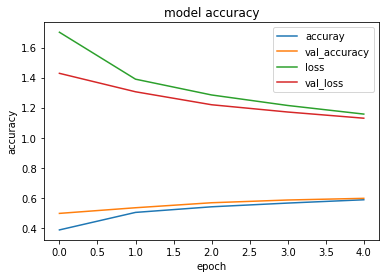

In [45]:
import matplotlib.pyplot as plt
# summarize history for accuracy&loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()

In [46]:
# Adding more layers

m = Sequential()
m.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m.add(Dropout(0.2))
m.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
m.add(MaxPooling2D(pool_size=(2, 2)))
m.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m.add(Dropout(0.2))
m.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m.add(MaxPooling2D(pool_size=(2, 2)))
m.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m.add(Dropout(0.2))
m.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m.add(MaxPooling2D(pool_size=(2, 2)))
m.add(Flatten())
m.add(Dropout(0.2))
m.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
m.add(Dropout(0.2))
m.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
m.add(Dropout(0.2))
m.add(Dense(num_classes, activation='softmax'))

In [47]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
m.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [48]:
print(m.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)       

In [53]:
history1=m.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/5
391/391 [==============================] - 439s 1s/step - loss: 2.0486 - accuracy: 0.2413 - val_loss: 2.0238 - val_accuracy: 0.2777
Epoch 2/5
391/391 [==============================] - 527s 1s/step - loss: 1.7079 - accuracy: 0.3755 - val_loss: 1.6096 - val_accuracy: 0.4255
Epoch 3/5
391/391 [==============================] - 523s 1s/step - loss: 1.5562 - accuracy: 0.4321 - val_loss: 1.5538 - val_accuracy: 0.4465
Epoch 4/5
391/391 [==============================] - 528s 1s/step - loss: 1.4639 - accuracy: 0.4689 - val_loss: 1.4461 - val_accuracy: 0.4840
Epoch 5/5
391/391 [==============================] - 525s 1s/step - loss: 1.4019 - accuracy: 0.4915 - val_loss: 1.4086 - val_accuracy: 0.4927


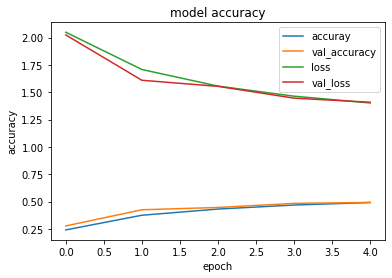

In [54]:
# summarize history for accuracy&loss
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()


In [55]:
scores = m.evaluate(X_test, y_test, verbose=0)
print("Accuracy after qsn1: %.2f%%" % (scores[1]*100))

Accuracy after qsn1: 49.27%


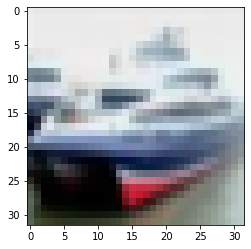

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 1


C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


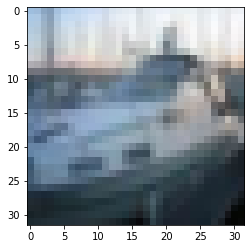

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 8


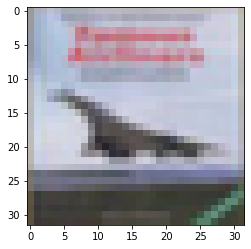

actual [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] predicted 0


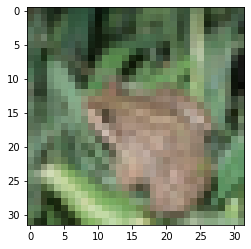

actual [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] predicted 4


In [56]:
import matplotlib.pyplot as plt
for k in range(1,5):
    plt.imshow(X_test[k,:,:])  
    plt.show()
    y=model.predict_classes(X_test[[k],:])
    print("actual",y_test[k],"predicted",y[0])

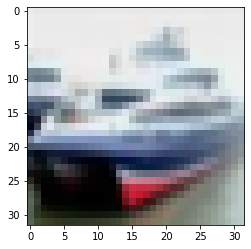

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 1


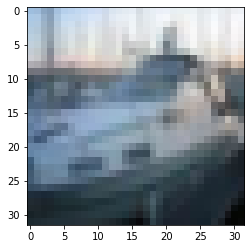

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 8


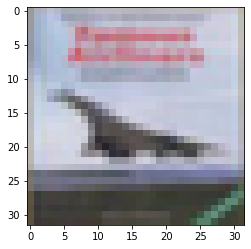

actual [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] predicted 0


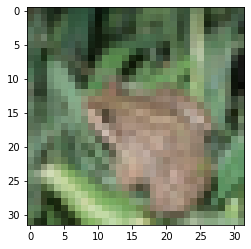

actual [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] predicted 4


In [57]:
# save and model
model.save('model1.h5')
from keras.models import load_model
model = load_model('model1.h5')
for k in range(1,5):
    plt.imshow(X_test[k,:,:])  
    plt.show()
    y=model.predict_classes(X_test[[k],:])
    print("actual",y_test[k],"predicted",y[0])